In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


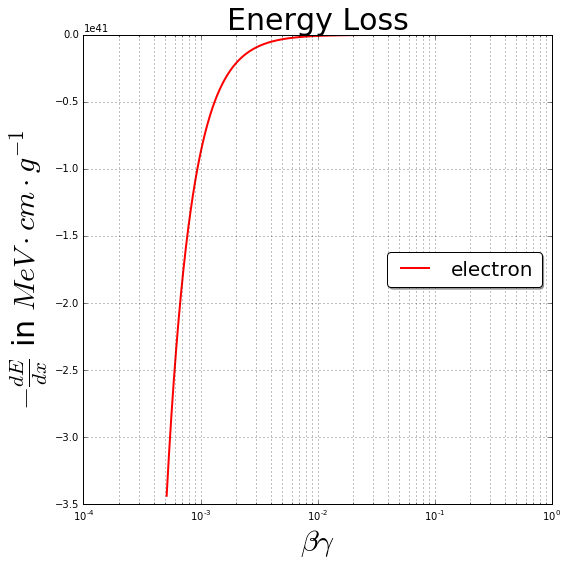

In [6]:
beta = np.arange(1e-1, 10, 1e-6)
c = 3e8   #speed of light
Z = 54    #atomic number of TPC medium
A = 131   #atomic mass of TPC medium
z = 1     #charge of the particle
re =2.8e-13   #radius of electron in meters
me = 511e3/(c**2)    # mass of electron in eV
M = 938e6/(c**2)     # mass of Proton
M2 = 3.72e9/(c**2)  # mass of alpha
M3 = 105e6/(c**2)   # mass of muon
Na = 6.02e23    # avagrado number mol-1

gamma = 1/(np.sqrt(1-beta**2))
X = beta*gamma
#Wmax = (2*me*c**2*(t**2))/(1+2*gamma*(me/M)+(me/M)**2)

def f(t):
    return 2*np.pi*Na*re**2*me*c**2*(Z/A)*(z/beta)**2*(np.log((2*me*c**2*(t**2)*(2*me*c**2*(t**2))/(1+2*gamma*(me/M)+(me/M)**2))/(10))-beta**2)

def ff(t):
    return 2*np.pi*Na*re**2*me*c**2*(Z/A)*(2/beta)**2*(np.log((2*me*c**2*(t**2)*(2*me*c**2*(t**2))/(1+2*gamma*(me/M2)+(me/M2)**2))/(10))-beta**2)

def fff(t):
    return 2*np.pi*Na*re**2*me*c**2*(Z/A)*(z/beta)**2*(np.log((2*me*c**2*(t**2)*(2*me*c**2*(t**2))/(1+2*gamma*(me/M3)+(me/M3)**2))/(10))-beta**2)

def ffff(t):
    return 2*np.pi*Na*re**2*me*c**2*(Z/A)*(z/beta)**2*(np.log((2*me*c**2*(t**2)*(2*me*c**2*(t**2))/(1+2*gamma*(me/me)+(me/me)**2))/(10))-beta**2)

def fele(t):
    return 2*np.pi*Na*Z**2/(me*t**2)*np.log(2*me*t**2/(10*Z))


#Pro= np.sqrt((X*M*c**2)**2+(M*c**2)**2)/(1e9) # this is to correct beta gamma to momentum in GeV
#Alp=np.sqrt((X*M2*c**2)**2+(M2*c**2)**2)/(1e9)
#Muo=np.sqrt((X*M3*c**2)**2+(M3*c**2)**2)/(1e9)
Ele=np.sqrt((X*me*c**2)**2+(me*c**2)**2)/(1e9)

plt.figure(figsize=(8,8))

#plt.semilogx(X,f(Pro)/(1e6),color='b',label='proton',linewidth=2)
#plt.semilogx(X,ff(Alp)/(1e6),color='g',label='alpha',linewidth=2)
#plt.semilogx(X,fff(Muo)/(1e6),color='r',label='muon',linewidth=2)
plt.semilogx(Ele,fele(Ele)/(1e6),color='r',label='electron',linewidth=2)
plt.grid(True, which="both")
plt.xlabel(r'$ \beta \gamma $',fontsize=30)
plt.ylabel(r'$- \frac{dE}{dx}$ in $MeV \cdot cm \cdot g^{-1}$',fontsize=30)
plt.title('Energy Loss',fontsize=30)
#plt.xlim(1e-1,5e2)
plt.ylim(0,1.5e1)
plt.legend(loc='center right',fontsize=20,shadow=True, fancybox=True)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/bgloss.pdf')

plt.show()

In [8]:
max(fele(Ele))

-4.988742527205352e+41

In [3]:
min(f(X))

1988521.1857093701

In [4]:
np.where(f(X)==min(f(X)))[0][0]

866909

In [5]:
X[800000]

2.0647416048447162

In [6]:
len(f(X))

900000

In [7]:
min(fff(X))

1986299.5095752452

In [8]:
np.where(fff(X)==min(fff(X)))[0][0]

867146

In [9]:
X[867146]

3.8043425659150794

In [10]:
min(f(Pro))

1980135.8699009207

In [11]:
np.where(f(Pro)==min(f(Pro)))[0][0]

868971

In [12]:
min(fff(Muo))

1388501.8633849146

In [13]:
np.where(fff(Muo)==min(fff(Muo)))[0][0]

856343

In [14]:
Muo[856343]

0.35928563565002231

In [15]:
# Xenon Z=54 A=131 Now I will compute the density of the gas in the tpc medium and mutiply it in Y.
# Lets do this for 15 bar at room temptuare 

R = 81.34# cm^3 bar/K mol
T = 293  # room temp in K
P = 15  # working pressure
Density2 = 3.1 # This is the density of liquid xenon
Density = (A*P)/(R*T)
Density

0.08245002018242223

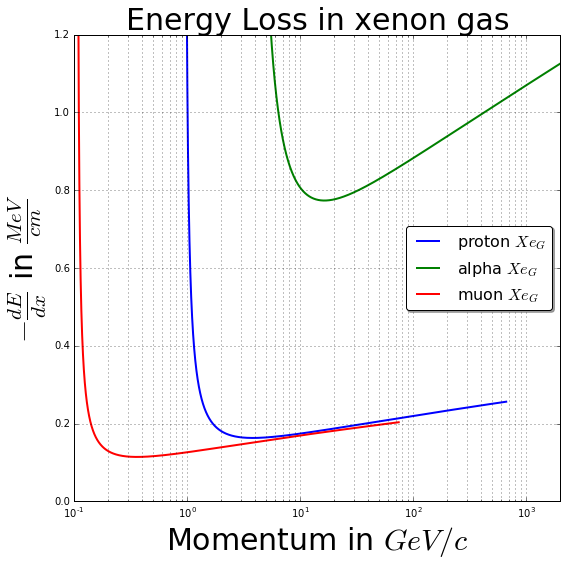

In [16]:
plt.figure(figsize=(8,8))

plt.semilogx(Pro,Density*f(Pro)/(1e6),color='b',label=r'proton $Xe_G$',linewidth=2)
plt.semilogx(Alp,Density*ff(Alp)/(1e6),color='g',label=r'alpha $Xe_G$',linewidth=2)
plt.semilogx(Muo,Density*fff(Muo)/(1e6),color='r',label=r'muon $Xe_G$',linewidth=2)

#plt.semilogx(Pro,Density2*f(Pro)/(1e6),color='b',label=r'proton $Xe_L$',linewidth=2,linestyle=':')
#plt.semilogx(Alp,Density2*ff(Alp)/(1e6),color='g',label=r'alpha $Xe_L$',linewidth=2,linestyle=':')
#plt.semilogx(Muo,Density2*fff(Muo)/(1e6),color='r',label=r'muon $Xe_L$',linewidth=2,linestyle=':')

plt.grid(True, which="both")
plt.xlabel(r'Momentum in $ GeV/c $',fontsize=30)
plt.ylabel(r'$- \frac{dE}{dx}$ in $\frac{MeV}{cm}$',fontsize=30)
plt.title('Energy Loss in xenon gas',fontsize=30)
plt.xlim(1e-1,2e3)
plt.ylim(0,1.2)
plt.legend(loc='center right',fontsize=16,shadow=True, fancybox=True)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/evlossgas.pdf')

plt.show()

In [ ]:
a = np.sqrt((338e3)**2+(1e6)**2)
a